In [108]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as mp
import math
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Reading the file and displaying info
fifa_df = pd.read_csv('fifa.csv')
fifa_df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [6]:
fifa_df['ID'].nunique()

18207

**Inferences**
* There are 18207 entries and 60 columns
* There are few object type columns
* There are null values in some of the columns
* ID is the unique identifier

In [8]:
fifa_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0
Crossing,18159.0,49.734181,18.364524,5.0,38.0,54.0,64.0,93.0
Finishing,18159.0,45.550911,19.525820,2.0,30.0,49.0,62.0,95.0


In [9]:
#Displaying shape
print('Number of rows in the dataset:',fifa_df.shape[0])
print('Number of columns in the dataset:',fifa_df.shape[1])

Number of rows in the dataset: 18207
Number of columns in the dataset: 60


In [10]:
#Checking for null values
fifa_df.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys       

In [ ]:
#Dropping redundant columns
fifa_df.drop(['Photo','Flag','Club Logo'],axis=1,inplace=True)

In [13]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

In [14]:
#checking for duplicate records
fifa_df[fifa_df.duplicated()]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause


In [15]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

In [16]:
#Creating function for cleaning of the currency, million and thousands symbols
def clean_currency(x):
    if isinstance(x,str):
        return(x.replace('€','').replace('.','').replace('M','000000').replace('K','000'))
    return(x)

In [17]:
#cleaning data for required columns
fifa_df['Release Clause'] = fifa_df['Release Clause'].apply(clean_currency).astype('float')
fifa_df['Value'] = fifa_df['Release Clause'].apply(clean_currency).astype('float')
fifa_df['Wage'] = fifa_df['Release Clause'].apply(clean_currency).astype('float')

In [18]:
fifa_df[:5]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,2.265000e+09,2.265000e+09,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2.265000e+09
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,1.271000e+09,1.271000e+09,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1.271000e+09
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,2.281000e+09,2.281000e+09,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,2.281000e+09
3,193080,De Gea,27,Spain,91,93,Manchester United,1.386000e+09,1.386000e+09,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1.386000e+09
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,1.964000e+09,1.964000e+09,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1.964000e+09


In [19]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     16643 non-null  float64
 8   Wage                      16643 non-null  float64
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

In [20]:
#viewing the "Joined" column
fifa_df.loc[:,"Joined"]

0         Jul 1, 2004
1        Jul 10, 2018
2         Aug 3, 2017
3         Jul 1, 2011
4        Aug 30, 2015
             ...     
18202     May 3, 2017
18203    Mar 19, 2018
18204     Jul 1, 2017
18205    Apr 24, 2018
18206    Oct 30, 2018
Name: Joined, Length: 18207, dtype: object

In [40]:
#function for cleaning and converting to int data type
def clean_joined_int(x):
    if isinstance(x,str):
        x = x[-4:].strip()
        return(x)
    return(x)

In [42]:
#cleaning column "Joined"
fifa_df['Joined'] = fifa_df['Joined'].apply(clean_joined_int).replace(np.nan, 0).astype(int)
fifa_df.loc[:,"Joined"]

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 18207, dtype: int32

In [43]:
#viewing the "Contract Valid Until" column
fifa_df.loc[:,"Contract Valid Until"]

0        2021
1        2022
2        2022
3        2020
4        2023
         ... 
18202    2019
18203    2020
18204    2021
18205    2019
18206    2019
Name: Contract Valid Until, Length: 18207, dtype: object

In [44]:
#Converting "Contract Valid Until" column from object to pandas datetime type
fifa_df['Contract Valid Until'] = pd.to_datetime(fifa_df['Contract Valid Until'])
fifa_df.loc[:,"Contract Valid Until"]

0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

In [45]:
#viewing the 'Height' column
fifa_df.loc[:,"Height"]

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
         ... 
18202     5'9
18203     6'3
18204     5'8
18205    5'10
18206    5'10
Name: Height, Length: 18207, dtype: object

In [56]:
#Defining function for convert object "5'7" to inches in float "67.0"
def parse_ht(ht):
    if ht == 0:
        return(ht)
    else:
        ht_str = str(ht)
        ht_ = ht_str.split("'")
        ft_ = float(ht_[0])
        in_ = float(ht_[1].replace("\"",""))
        return (12*ft_) + in_

In [ ]:
fifa_df['Height'] = fifa_df['Height'].replace(np.nan, 0).apply(parse_ht)

In [60]:
fifa_df.loc[:,"Height"]

0        67.0
1        74.0
2        69.0
3        76.0
4        71.0
         ... 
18202    69.0
18203    75.0
18204    68.0
18205    70.0
18206    70.0
Name: Height, Length: 18207, dtype: float64

In [61]:
#viewing colum "Weight"
fifa_df.loc[:,"Weight"]

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object

In [62]:
#Defining function to convert object "159lbs" to float "159.0"
def conv_weight_float(x):
    if x == 0:
        return(x)
    else:
        x = x[:3].strip()
        x = float(x)
        return (x)

In [63]:
fifa_df['Weight'] = fifa_df['Weight'].replace(np.nan, 0).apply(conv_weight_float)

In [64]:
fifa_df.loc[:,"Weight"]

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

In [65]:
fifa_df.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                        1564
Wage                         1564
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                          0
Loaned From                 16943
Contract Valid Until          289
Height                          0
Weight                          0
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy    

In [66]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      17966 non-null  object        
 7   Value                     16643 non-null  float64       
 8   Wage                      16643 non-null  float64       
 9   Preferred Foot            18159 non-null  object        
 10  International Reputation  18159 non-null  float64       
 11  Weak Foot                 18159 non-null  float64       
 12  Skill Moves       

Text(0.5, 1.0, 'Distribution of Players Overall Ratings')

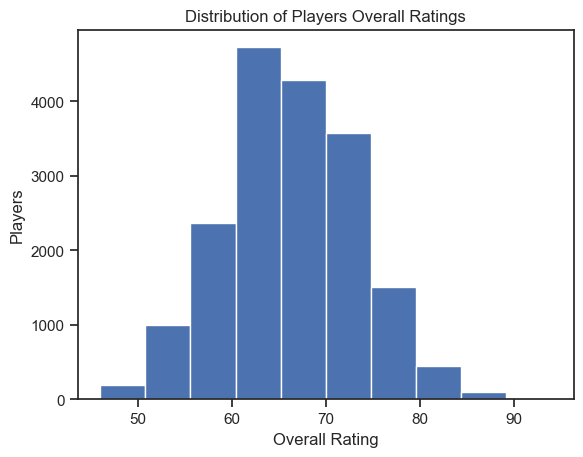

In [67]:
#plot for distribution of Overall ratings
ratings = fifa_df["Overall"]
plt.hist(ratings)
plt.xlabel('Overall Rating')
plt.ylabel('Players')
plt.title('Distribution of Players Overall Ratings')

**Findings** 
* Majority of the players have ratings between 60-80

In [82]:
#Retrieving names of top 20 players based on overall rating
fifa_df.sort_values('Overall', ascending=False)[['Name','Overall']].head(20)

,Name,Overall
0,L. Messi,94
1,Cristiano Ronaldo,94
2,Neymar Jr,92
3,De Gea,91
4,K. De Bruyne,91
5,E. Hazard,91
6,L. Modrić,91
7,L. Suárez,91
8,Sergio Ramos,91
12,D. Godín,90


In [79]:
#Generating dataframe with top 20 players
fifa_df2 = fifa_df.sort_values('Overall', ascending=False).head(20)

In [81]:
display(fifa_df2)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,2.265000e+09,2.265000e+09,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2.265000e+09
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,1.271000e+09,1.271000e+09,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1.271000e+09
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,2.281000e+09,2.281000e+09,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,2.281000e+09
3,193080,De Gea,27,Spain,91,93,Manchester United,1.386000e+09,1.386000e+09,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1.386000e+09
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,1.964000e+09,1.964000e+09,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1.964000e+09
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,1.721000e+09,1.721000e+09,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,1.721000e+09
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,1.374000e+09,1.374000e+09,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,1.374000e+09
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,1.640000e+08,1.640000e+08,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,1.640000e+08
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,1.046000e+09,1.046000e+09,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,1.046000e+09
12,182493,D. Godín,32,Uruguay,90,90,Atlético Madrid,9.020000e+08,9.020000e+08,Right,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,9.020000e+08


In [83]:
#Finding average of "Age" and "Wage"
display(fifa_df2[['Age','Wage']].mean())

Age     2.955000e+01
Wage    1.190450e+09
dtype: float64

In [85]:
#Finding player with highest "Wage" and displaying "Name" and "Wage"
fifa_df2.sort_values('Wage', ascending=False)[['Name','Wage']].head(1)

,Name,Wage
2,Neymar Jr,2.281000e+09


In [90]:
#Generating dataframe with "Name", "Club", "Wage" and "Overall" rating
fifa_df3 = pd.DataFrame(fifa_df,columns = ['Name','Club',"Wage","Overall"])
display(fifa_df3)

,Name,Club,Wage,Overall
0,L. Messi,FC Barcelona,2.265000e+09,94
1,Cristiano Ronaldo,Juventus,1.271000e+09,94
2,Neymar Jr,Paris Saint-Germain,2.281000e+09,92
3,De Gea,Manchester United,1.386000e+09,91
4,K. De Bruyne,Manchester City,1.964000e+09,91
...,...,...,...,...
18202,J. Lundstram,Crewe Alexandra,1.430000e+05,47
18203,N. Christoffersson,Trelleborgs FF,1.130000e+05,47
18204,B. Worman,Cambridge United,1.650000e+05,47
18205,D. Walker-Rice,Tranmere Rovers,1.430000e+05,47


In [94]:
#Displaying average overall rating for each club
fifa_df4 = fifa_df3.groupby('Club')['Overall'].mean()
display(fifa_df4)

Club
 SSV Jahn Regensburg     65.586207
1. FC Heidenheim 1846    65.750000
1. FC Kaiserslautern     63.384615
1. FC Köln               70.785714
1. FC Magdeburg          65.615385
                           ...    
Zagłębie Sosnowiec       60.760000
Çaykur Rizespor          66.900000
Örebro SK                60.481481
Östersunds FK            63.545455
Śląsk Wrocław            62.200000
Name: Overall, Length: 651, dtype: float64

In [101]:
#Displaying plot for average rating for top 10 clubs
fifa_df5 = fifa_df3.groupby('Club').Overall.mean().sort_values(ascending=False).head(10)
display(fifa_df5)

Club
Juventus               82.280000
Napoli                 80.000000
Inter                  79.750000
Real Madrid            78.242424
Milan                  78.074074
FC Barcelona           78.030303
Paris Saint-Germain    77.433333
Roma                   77.423077
Manchester United      77.242424
FC Bayern München      77.000000
Name: Overall, dtype: float64

Text(0.5, 1.0, 'Distribution of Clubs Average Overall Ratings')

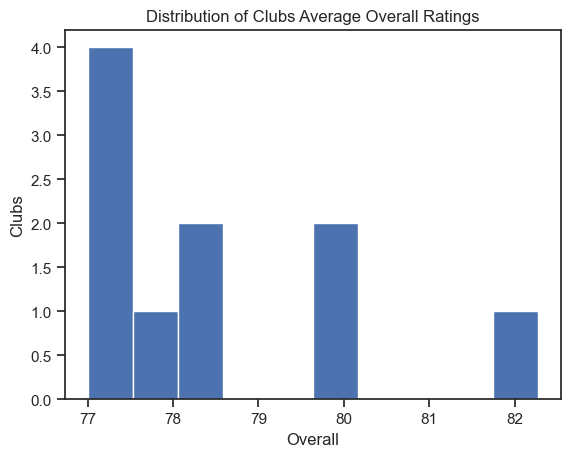

In [105]:
ratings = fifa_df3.groupby('Club').Overall.mean().sort_values(ascending=False).head(10)
plt.hist(ratings)
plt.xlabel('Overall Ratings')
plt.ylabel('Clubs')
plt.title('Distribution of Top 10 Clubs Average Overall Ratings')

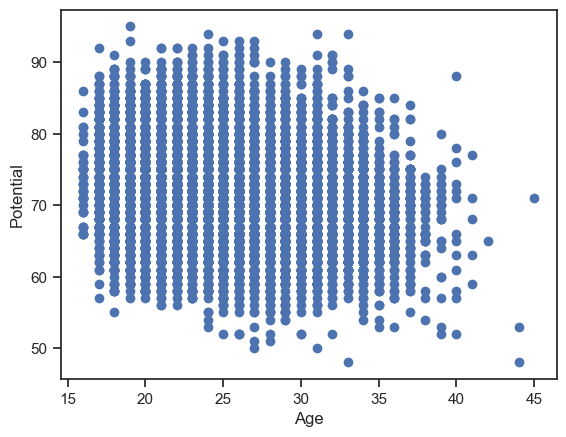

In [107]:
#Relationship between "Age" and "Potential"
age = fifa_df['Age']
indv_poten = fifa_df['Potential']
plt.xlabel("Age")
plt.ylabel("Potential")
plt.scatter(x=age, y=indv_poten)

* Based on the plot potential declines with age

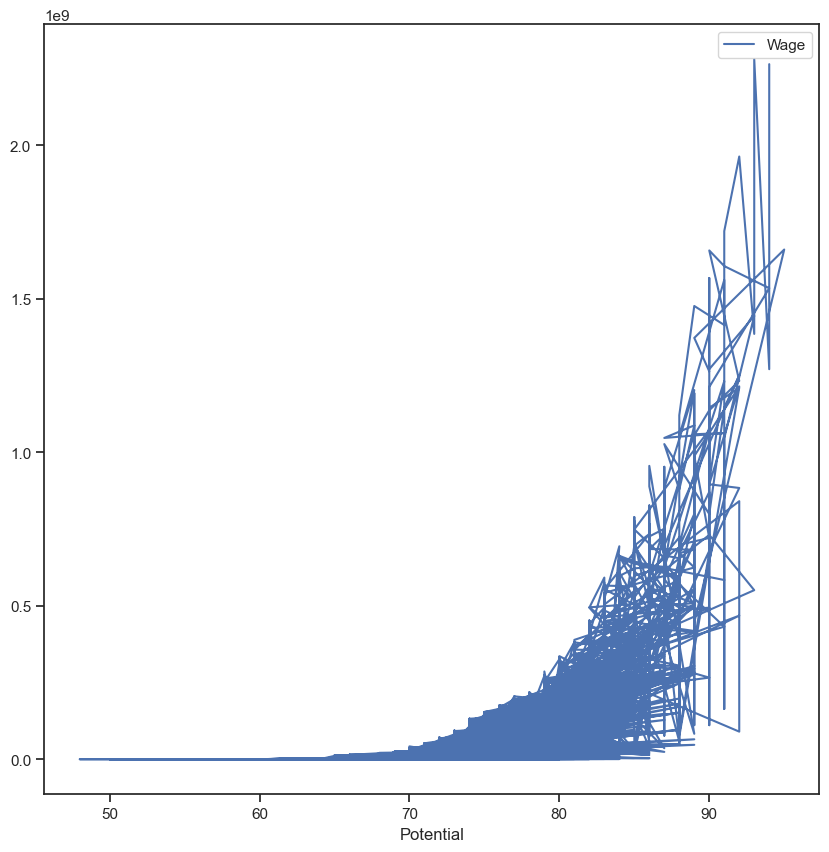

In [126]:
#Plot for wages vs potential,overall,value,international reputation and release clause
fifa_df.plot(x="Potential", y=["Wage"], kind="line", figsize=(10,10))
mp.show()

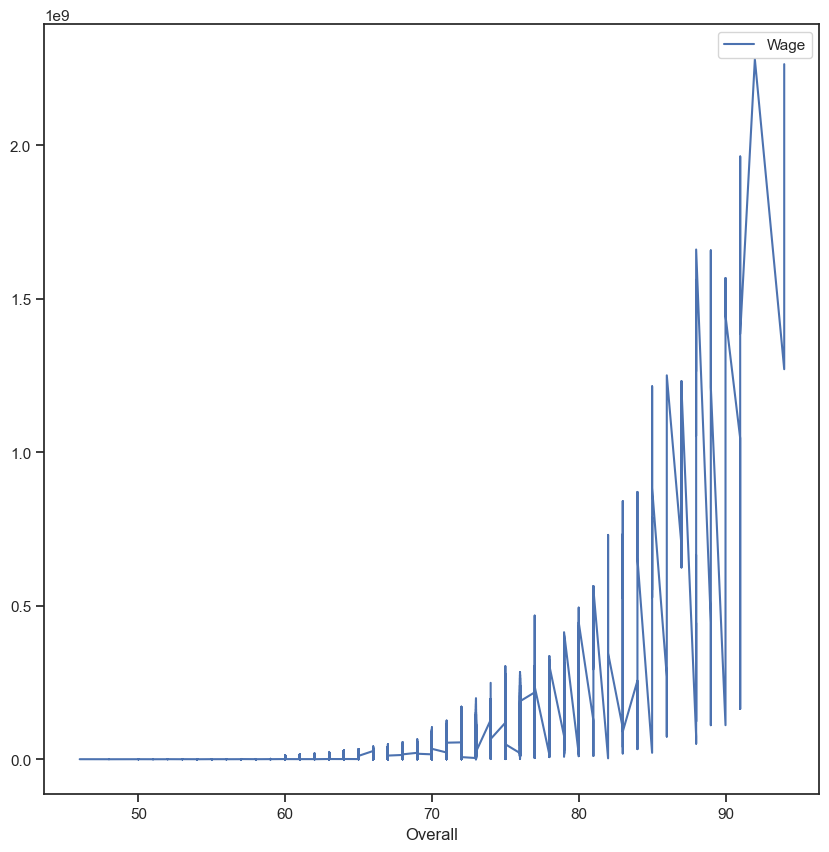

In [127]:
fifa_df.plot(x="Overall", y=["Wage"], kind="line", figsize=(10,10))
mp.show()

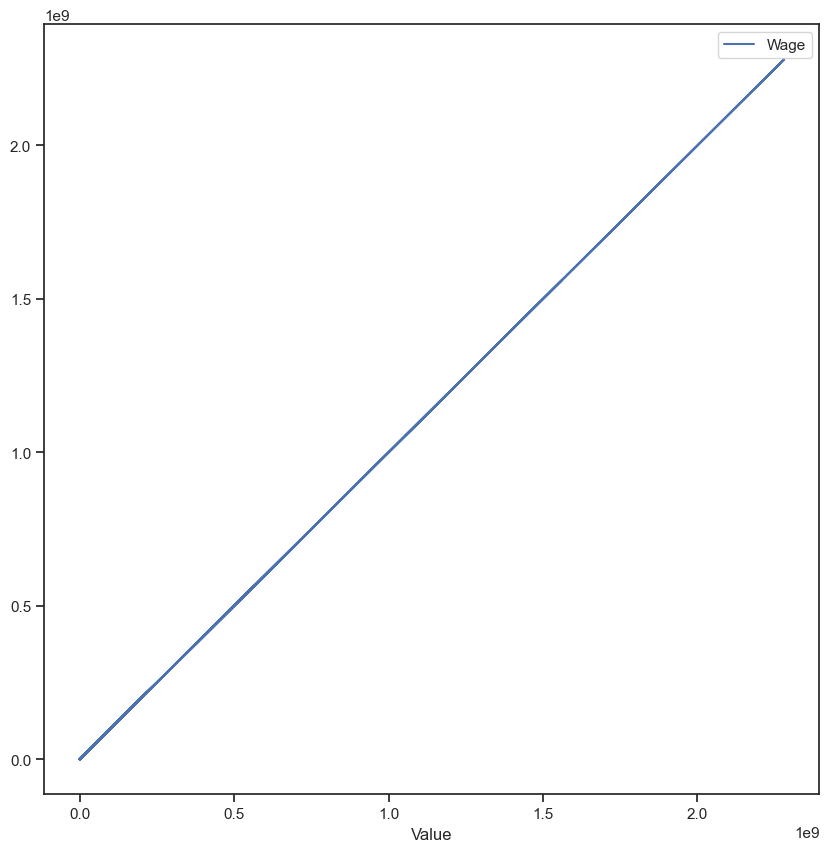

In [128]:
fifa_df.plot(x="Value", y=["Wage"], kind="line", figsize=(10,10))
mp.show()

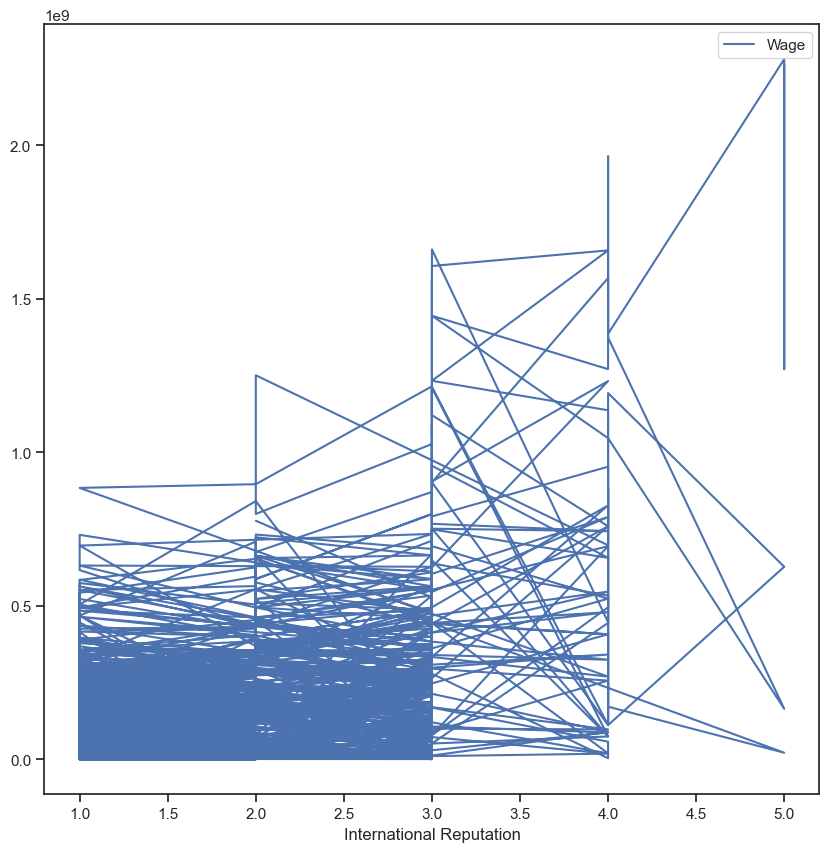

In [129]:
fifa_df.plot(x="International Reputation", y=["Wage"], kind="line", figsize=(10,10))
mp.show()

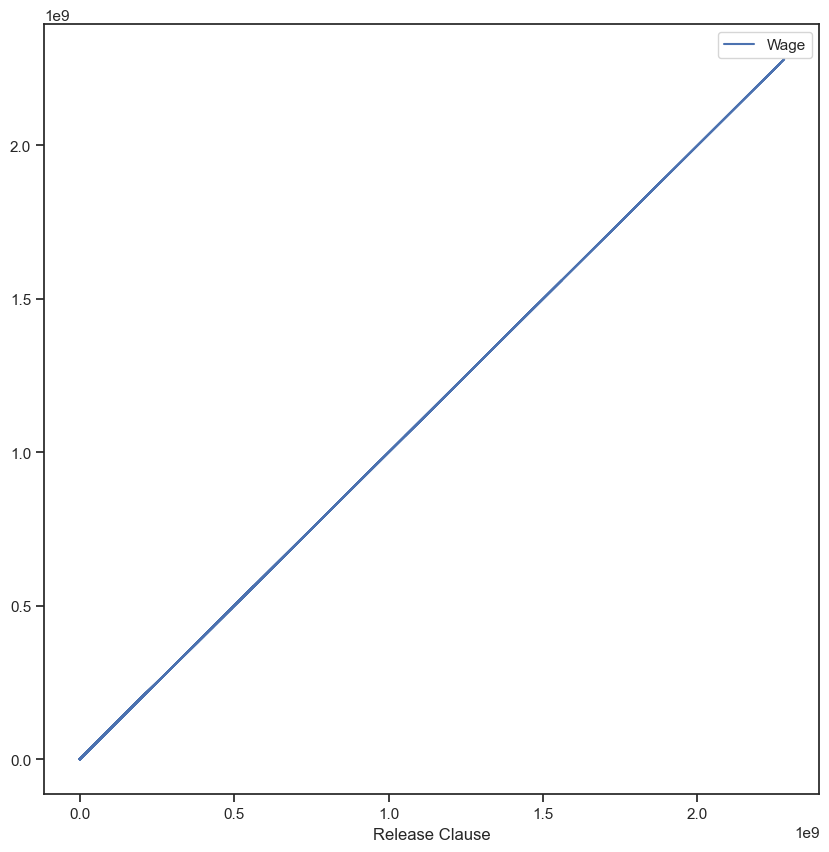

In [130]:
fifa_df.plot(x="Release Clause", y=["Wage"], kind="line", figsize=(10,10))
mp.show()

* From the plots it can be seen that Value and Release Cluase have a linear relationship with Wage

<function matplotlib.pyplot.show(close=None, block=None)>

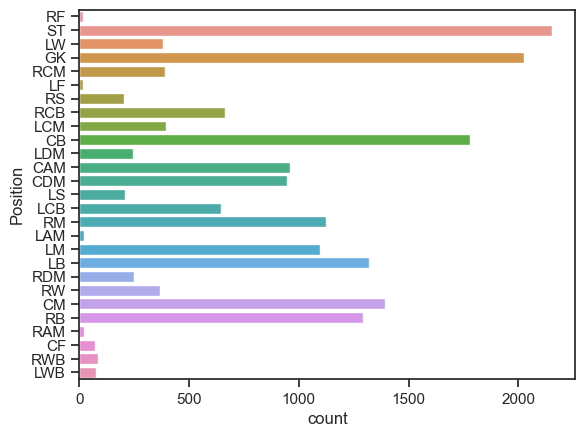

In [134]:
#plot for distribution of position
sns.countplot(y='Position', data=fifa_df)
plt.show

* As seen for the plot Position where maximum number of players play is ST and minimum number of players play at RF